In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import math
import os

In [2]:
#for linear regression  using the statsmodelspackage
import statsmodels.api as stm

/Users/skywalker/anaconda3/lib/python3.6/site-packages/statsmodels/compat/pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


In [3]:
#for linear regression using the sklearn package
import scipy.stats as stats
import sklearn

# Reading the Data

In [4]:
os.chdir("/Users/skywalker/Downloads")
cars = pd.read_csv("cars.csv")

In [5]:
cars.sample(5)

,Car,MPG,Cylinders,Displacement,Horsepower,Weight,Acceleration,Model,Origin
324,Audi 4000,34.3,4,97.0,78,2188,15.8,80,Europe
119,Ford Pinto,19.0,4,122.0,85,2310,18.5,73,US
179,Volkswagen Dasher,25.0,4,90.0,71,2223,16.5,75,Europe
231,Mercury Cougar Brougham,15.0,8,302.0,130,4295,14.9,77,US
90,Dodge Colt (sw),28.0,4,98.0,80,2164,15.0,72,US


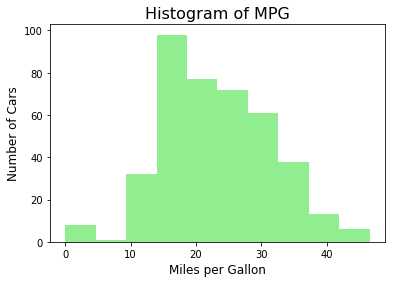

In [6]:
cars.hist(column = "MPG", grid='False', color='LightGreen')
plt.xlabel("Miles per Gallon", fontsize=12)
plt.ylabel("Number of Cars", fontsize=12)
plt.title("Histogram of MPG", fontsize=16)
plt.show()

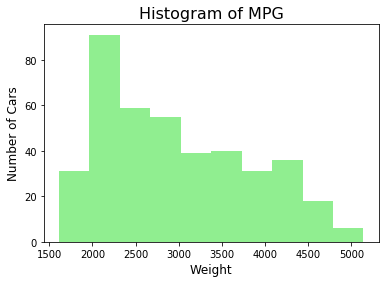

In [7]:
cars.hist(column = "Weight", grid='False', color='Lightgreen')
plt.xlabel("Weight", fontsize=12)
plt.ylabel("Number of Cars", fontsize=12)
plt.title("Histogram of MPG", fontsize=16)
plt.show()

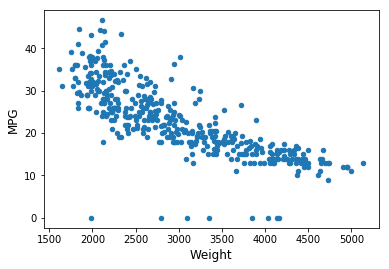

In [8]:
cars.plot(kind='scatter', x='Weight', y='MPG')
plt.xlabel("Weight", fontsize=12)
plt.ylabel("MPG", fontsize=12)
plt.show()

In [9]:
cars2 = cars.loc[cars.MPG!=0,]
cars2[['MPG','Weight']].describe().transpose()

,count,mean,std,min,25%,50%,75%,max
MPG,398.0,23.514573,7.815984,9.0,17.50,23.0,29.0,46.6
Weight,398.0,2970.424623,846.841774,1613.0,2223.75,2803.5,3608.0,5140.0


In [10]:
np.random.seed(12)
train = np.random.choice(cars2.index, round(0.7*398), replace=False)
train.sort()

In [11]:
x_train = cars2.loc[train, 'Weight']
y_train = cars2.loc[train, 'MPG']
#x_train

In [12]:
test = []
for i in (cars2.index):
    if i not in train:
        test.append(i)
test = np.array(test)
test.sort()

In [13]:
x_test = cars2.loc[test, ['Weight']]
y_test = cars2.loc[test, 'MPG']
#x_test

In [14]:
print(len(x_train), len(y_train))
print(len(x_test), len(y_test))

279 279
119 119


In [15]:
x_train = stm.add_constant(x_train)
x_train.head()

,const,Weight
0,1.0,3504
1,1.0,3693
3,1.0,3433
4,1.0,3449
5,1.0,4341


In [16]:
model = stm.OLS(y_train, x_train).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    MPG   R-squared:                       0.701
Model:                            OLS   Adj. R-squared:                  0.700
Method:                 Least Squares   F-statistic:                     650.7
Date:                Wed, 18 Apr 2018   Prob (F-statistic):           1.14e-74
Time:                        11:59:22   Log-Likelihood:                -800.39
No. Observations:                 279   AIC:                             1605.
Df Residuals:                     277   BIC:                             1612.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         46.7392      0.955     48.937      0.000      44.859      48.619
Weight        -0.0078      0.000    -25.508      0.000      -0.008      -0.007
==============================================================================
Omnibus:                       26.070   Durbin-Watson:                   0.891
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               36.327
Skew:                           0.634   Prob(JB):                     1.29e-08
Kurtosis:                       4.232   Cond. No.                     1.17e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.17e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

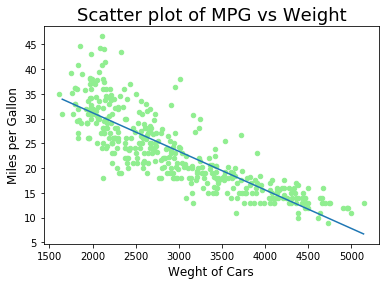

In [17]:
cars2.plot(kind='scatter', x='Weight', y='MPG', color='LightGreen')
plt.ylabel('Miles per Gallon', fontsize= 12)
plt.xlabel('Weght of Cars', fontsize= 12)
plt.title('Scatter plot of MPG vs Weight', fontsize= 18)

Weight = np.sort(x_train.Weight)

plt.plot(Weight, model.params[0] + model.params[1]*Weight)

plt.show()

In [18]:
x_test = stm.add_constant(x_test)
#x_test

In [19]:
model.predict(x_test)[:10]

2     19.981472
9     16.757463
26    25.931091
31    10.800056
33    12.614535
34     9.888924
53    27.986981
56    29.451023
61    34.178012
64    28.999351
dtype: float64

In [20]:
pred = model.predict(x_test)

In [21]:
sum((y_test - pred)**2)

2412.7064372859704

In [22]:
cars2['log_Weight'] = np.log(cars2['Weight'])

/Users/skywalker/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [23]:
cars2.loc[:,('log_MPG')] = np.log(cars2.loc[:,('MPG')])

/Users/skywalker/anaconda3/lib/python3.6/site-packages/pandas/core/indexing.py:337: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[key] = _infer_fill_value(value)
/Users/skywalker/anaconda3/lib/python3.6/site-packages/pandas/core/indexing.py:517: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


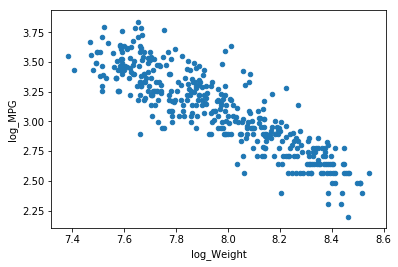

In [24]:
cars2.plot(kind='scatter', x='log_Weight', y='log_MPG')
plt.show()

we consider three vaiables mpg, weight and horsepower.
we plot a scatter plot matrix to identify the relationship between the response and the predictors.
we also try to identify which predictors are co-related.(co-related predictor implies redundant information)
we also try to identify the anomalies in each of the predictors.

/Users/skywalker/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: FutureWarning: 'pandas.tools.plotting.scatter_matrix' is deprecated, import 'pandas.plotting.scatter_matrix' instead.
  


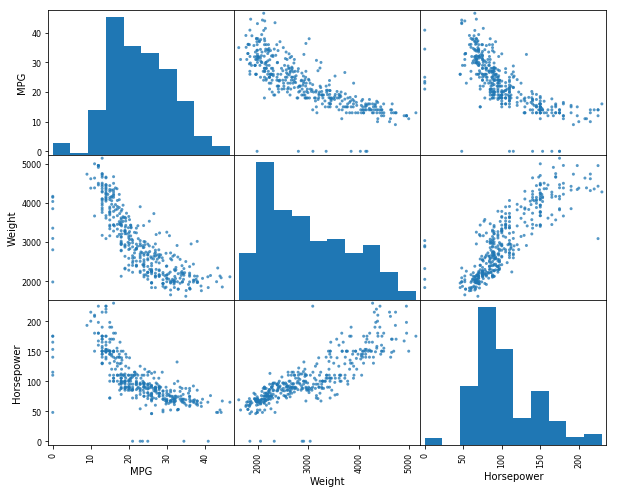

In [25]:
from pandas.tools.plotting import scatter_matrix
scatter_matrix(cars[['MPG', 'Weight', 'Horsepower']], alpha= 0.75, figsize= (10,8))
plt.show()

In [26]:
cars3 = cars.loc[(cars.MPG !=0) & (cars.Horsepower != 0)]
cars3.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
MPG,392.0,23.445918,7.805007,9.0,17.000,22.75,29.000,46.6
Cylinders,392.0,5.471939,1.705783,3.0,4.000,4.00,8.000,8.0
Displacement,392.0,194.411990,104.644004,68.0,105.000,151.00,275.750,455.0
Horsepower,392.0,104.469388,38.491160,46.0,75.000,93.50,126.000,230.0
Weight,392.0,2977.584184,849.402560,1613.0,2225.250,2803.50,3614.750,5140.0
Acceleration,392.0,15.541327,2.758864,8.0,13.775,15.50,17.025,24.8
Model,392.0,75.979592,3.683737,70.0,73.000,76.00,79.000,82.0


/Users/skywalker/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: FutureWarning: 'pandas.tools.plotting.scatter_matrix' is deprecated, import 'pandas.plotting.scatter_matrix' instead.
  """Entry point for launching an IPython kernel.


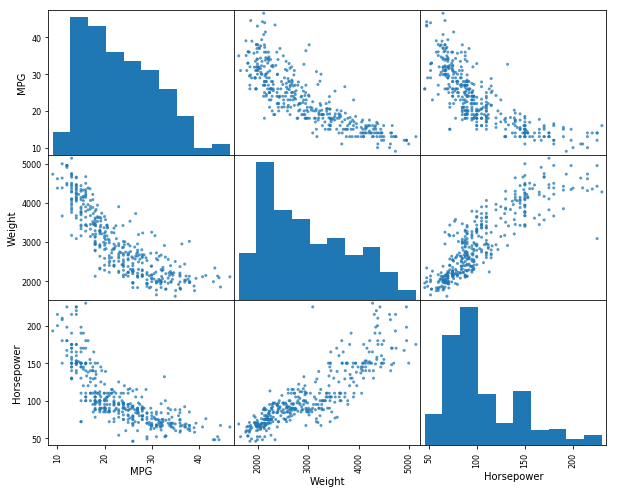

In [27]:
scatter_matrix(cars3[['MPG', 'Weight', 'Horsepower']], alpha= 0.75, figsize= (10,8))
plt.show()

In [28]:
cars3['log_Weight'] = np.log(cars3['Weight'])
cars3['log_MPG'] = np.log(cars3['MPG'])
cars3['log_HP'] = np.log(cars3['Horsepower'])

/Users/skywalker/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
/Users/skywalker/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
/Users/skywalker/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats 

/Users/skywalker/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: FutureWarning: 'pandas.tools.plotting.scatter_matrix' is deprecated, import 'pandas.plotting.scatter_matrix' instead.
  """Entry point for launching an IPython kernel.


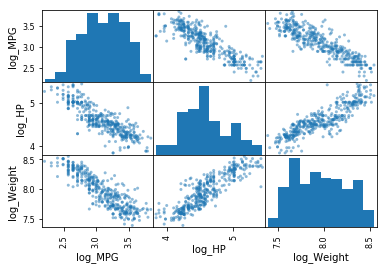

In [29]:
scatter_matrix(cars3[['log_MPG','log_HP','log_Weight']])
plt.show()

In [30]:
np.random.seed(78)
train2 = np.random.choice(cars3.index, round(0.7*398), replace=False)
train2.sort()

In [31]:
x_train = cars3.loc[train2, ['log_Weight', 'log_HP']]
y_train = cars3.loc[train2, 'log_MPG']

In [32]:
test2 = []
for i in cars3.index:
    if i not in train2:
        test2.append(i)
test2 = np.array(test2)
test2.sort()

In [33]:
x_test = cars3.loc[test2, ['log_Weight', 'log_HP']]
y_test = cars3.loc[test2, 'log_MPG']

In [34]:
x_train = stm.add_constant(x_train)
x_train.head()

,const,log_Weight,log_HP
0,1.0,8.161660,4.867534
1,1.0,8.214194,5.105945
2,1.0,8.142063,5.010635
4,1.0,8.145840,4.941642
5,1.0,8.375860,5.288267


In [35]:
model = stm.OLS(y_train, x_train).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                log_MPG   R-squared:                       0.794
Model:                            OLS   Adj. R-squared:                  0.792
Method:                 Least Squares   F-statistic:                     530.8
Date:                Wed, 18 Apr 2018   Prob (F-statistic):           2.57e-95
Time:                        11:59:25   Log-Likelihood:                 129.47
No. Observations:                 279   AIC:                            -252.9
Df Residuals:                     276   BIC:                            -242.0
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          9.6127      0.345     27.874      0.000       8.934      10.292
log_Weight    -0.5333      0.068     -7.787      0.000      -0.668      -0.398
log_HP        -0.4922      0.056     -8.774      0.000      -0.603      -0.382
==============================================================================
Omnibus:                        3.133   Durbin-Watson:                   0.923
Prob(Omnibus):                  0.209   Jarque-Bera (JB):                3.170
Skew:                           0.119   Prob(JB):                        0.205
Kurtosis:                       3.464   Cond. No.                         356.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [36]:
x_test = stm.add_constant(x_test)
x_test[:10]

,const,log_Weight,log_HP
3,1.0,8.141190,5.010635
8,1.0,8.395026,5.416100
16,1.0,8.191186,5.075174
18,1.0,8.232440,5.010635
28,1.0,7.772753,4.553877
29,1.0,7.711549,4.727388
35,1.0,7.663877,4.477337
43,1.0,8.102284,4.477337
44,1.0,8.098035,4.605170
45,1.0,8.344980,5.105945


In [37]:
pred = model.predict(x_test)
pred[:20]

3     2.804715
8     2.469779
16    2.746287
18    2.756050
28    3.226015
29    3.173257
35    3.321751
43    3.087944
44    3.027293
45    2.649121
46    2.588792
48    2.710545
51    2.513590
55    3.114942
60    3.568693
66    3.531932
68    3.309556
70    2.598314
74    2.483949
76    2.633854
dtype: float64

In [38]:
y_test[:20]

3     2.772589
8     2.639057
16    2.639057
18    2.708050
28    3.218876
29    3.258097
35    3.295837
43    2.944439
44    2.890372
45    2.639057
46    2.639057
48    2.639057
51    2.564949
55    2.890372
60    3.433987
66    3.135494
68    3.044522
70    2.639057
74    2.397895
76    2.484907
Name: log_MPG, dtype: float64

In [39]:
np.sum((np.exp(pred)-np.exp(y_test))**2)

1910.1426984830202

In [40]:
np.exp(pred)

3      16.522368
8      11.819835
16     15.584657
18     15.737560
28     25.179120
29     23.885148
35     27.708833
43     21.931939
44     20.641275
45     14.141607
46     13.313674
48     15.037467
51     12.349190
55     22.532133
60     35.470202
66     34.189973
68     27.372959
70     13.441060
74     11.988509
76     13.927338
80     16.130569
81     15.170085
84     27.279773
85     23.300352
86     30.780863
87     26.325274
89     24.218751
92     13.931524
94     15.509942
96     15.701971
         ...    
278    22.187765
279    24.109097
285    31.933638
287    19.404889
290    21.821439
293    17.037417
297    15.533784
301    33.486792
306    24.828630
308    30.482052
310    33.086854
313    21.861686
318    31.090198
319    33.095593
327    25.247361
331    32.326546
341    24.306873
345    26.085124
350    37.720973
351    34.691431
354    33.486792
355    33.600160
364    23.322751
365    26.938713
370    20.066184
376    24.711586
383    31.373939
384    32.3175

In [41]:
np.exp(y_test)

3      16.0
8      14.0
16     14.0
18     15.0
28     25.0
29     26.0
35     27.0
43     19.0
44     18.0
45     14.0
46     14.0
48     14.0
51     13.0
55     18.0
60     31.0
66     23.0
68     21.0
70     14.0
74     11.0
76     12.0
80     13.0
81     13.0
84     22.0
85     21.0
86     26.0
87     22.0
89     23.0
92     13.0
94     13.0
96     15.0
       ... 
278    23.2
279    23.8
285    31.5
287    21.5
290    20.2
293    17.6
297    15.5
301    34.1
306    27.2
308    34.2
310    31.8
313    28.8
318    32.1
319    37.2
327    37.0
331    40.8
341    23.7
345    27.2
350    39.1
351    39.0
354    37.0
355    37.7
364    32.9
365    31.6
370    24.2
376    27.0
383    36.0
384    37.0
385    31.0
388    36.0
Name: log_MPG, Length: 113, dtype: float64

In [42]:
#maths of linear regression

In [43]:
len(cars2)

398

In [44]:
model.params

const         9.612650
log_Weight   -0.533312
log_HP       -0.492182
dtype: float64

In [45]:
x = np.array(cars2['log_Weight'])

In [46]:
y = np.array(cars2['log_MPG'])

In [47]:
(np.sum(y)*np.sum(x**2)-np.sum(x)*np.sum(x*y))/((len(x)*np.sum(x**2))-(np.sum(x**2)))

0.014317769913589802

In [ ]:
# confidence interval interpretation

In [60]:
x = np.mean(cars['MPG'])

23.051231527093602

In [54]:
y = np.std(cars['MPG'])

In [58]:
print("95% C.I. for mean of mpg: (",x-(1.96)*(y/(len(cars)**0.5)),",",x+(1.96)*(y/(len(cars)**0.5)))

95% C.I. for mean of mpg: ( 22.23497114546312 , 23.867491908724084


In [59]:
print("90% C.I. for mean of mpg: (",x-(1.65)*(y/(len(cars)**0.5)),",",x+(1.65)*(y/(len(cars)**0.5)))

90% C.I. for mean of mpg: ( 22.36407355276182 , 23.738389501425385
